In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feedback-prize-effectiveness/sample_submission.csv
/kaggle/input/feedback-prize-effectiveness/train.csv
/kaggle/input/feedback-prize-effectiveness/test.csv
/kaggle/input/feedback-prize-effectiveness/test/D72CB1C11673.txt
/kaggle/input/feedback-prize-effectiveness/train/87A6EF3113C6.txt
/kaggle/input/feedback-prize-effectiveness/train/24687D08CFDA.txt
/kaggle/input/feedback-prize-effectiveness/train/B64326635AB6.txt
/kaggle/input/feedback-prize-effectiveness/train/53858BE44997.txt
/kaggle/input/feedback-prize-effectiveness/train/02F89B4E55CF.txt
/kaggle/input/feedback-prize-effectiveness/train/4B048F74F3E7.txt
/kaggle/input/feedback-prize-effectiveness/train/62FC97D29846.txt
/kaggle/input/feedback-prize-effectiveness/train/FDE359A2F973.txt
/kaggle/input/feedback-prize-effectiveness/train/B72D0B4875B4.txt
/kaggle/input/feedback-prize-effectiveness/train/9A1DC81E4FB5.txt
/kaggle/input/feedback-prize-effectiveness/train/BACC53ECC1FB.txt
/kaggle/input/feedback-prize-effectiven

In [2]:
#!pip install transformers

In [3]:
from transformers import AutoTokenizer, AutoConfig, AutoModel
from transformers import BertTokenizer, BertConfig, TFBertModel

model_path = '../input/huggingface-bert-variants/bert-base-cased/bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=True)
tokenizer.save_pretrained(".")
#tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained(model_path)

2022-08-22 07:37:59.513888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 07:37:59.515035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 07:37:59.515780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 07:37:59.517803: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import transformers
from transformers import AutoTokenizer,TFBertModel
df_train = pd.read_csv('../input/feedback-prize-effectiveness/train.csv')
df_test  = pd.read_csv('../input/feedback-prize-effectiveness/test.csv')
df_submission = pd.read_csv('../input/feedback-prize-effectiveness/sample_submission.csv')

# Here we will check what we have got in the data set by knowing it columns
# It denotes a features and target for the dataset, better way to know about the target is 
# Go through descroipton of the competiton another way is to go through sample submisson csv


In [5]:
df_train.columns,df_test.columns,df_submission.columns

(Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
        'discourse_effectiveness'],
       dtype='object'),
 Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type'], dtype='object'),
 Index(['discourse_id', 'Ineffective', 'Adequate', 'Effective'], dtype='object'))

In [6]:
df_Xte = df_test.drop(['discourse_id','essay_id','discourse_type'],axis=1)

In [7]:
df_Xte.head()

,discourse_text
0,Making choices in life can be very difficult. ...
1,Seeking multiple opinions can help a person ma...
2,it can decrease stress levels
3,a great chance to learn something new
4,can be very helpful and beneficial.


# To get the whole EDA in two line for the whole dataset,
# Since the datset is not big....EDA will be easy to go but be sure when you have huge data 
# EDA by this two line can take some time and too load too but it can save lot of effort in a single shot

In [8]:
#!pip install dataprep

In [9]:
#from dataprep.eda import create_report
#df_report_train = create_report(df_train)

In [10]:
#df_report_train # This object will show the eda of the dataset wherin we get all the required information

In [11]:
df_train.head() # To check first few row in the dataset

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [12]:
df_X = df_train.drop(['discourse_id','essay_id','discourse_type'],axis=1)

In [13]:
encoded_dict = {'Adequate':0,'Ineffective':1,'Effective':2}
df_train['discourse_effectiveness'] = df_train.discourse_effectiveness.map(encoded_dict)

In [14]:
df_train['discourse_effectiveness'].unique()

array([0, 1, 2])

In [15]:

#tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
#bert = TFBertModel.from_pretrained('bert-base-cased')

In [16]:
# Tokenize the input (takes some time) 
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=df_train.discourse_text.tolist(),
    add_special_tokens=True,
    max_length=97,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=df_test.discourse_text.tolist(),
    add_special_tokens=True,
    max_length=150,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [17]:
x_test['input_ids'].shape,x_test['attention_mask'].shape,x_train['input_ids'].shape,x_train['attention_mask'].shape

(TensorShape([10, 97]),
 TensorShape([10, 97]),
 TensorShape([36765, 97]),
 TensorShape([36765, 97]))

In [18]:
labels_zeros_test = tf.zeros((10, 3), dtype = 'int32')

In [19]:
dataset_test = tf.data.Dataset.from_tensor_slices((x_test['input_ids'],x_test['attention_mask'],labels_zeros_test))


In [20]:
y_train = to_categorical(df_train['discourse_effectiveness'])

In [21]:
#input_ids = x_train['input_ids']
#attention_mask = x_train['attention_mask']

In [22]:

dataset = tf.data.Dataset.from_tensor_slices((x_train['input_ids'], x_train['attention_mask'], y_train))

In [23]:
def map_change_dataset(input_ids, attention_mask, y_train):
  return {'input_ids':input_ids, 'attention_mask': attention_mask}, y_train

In [24]:
dataset = dataset.map(map_change_dataset)

In [25]:
dataset_test = dataset_test.map(map_change_dataset)

In [26]:
dataset_test

<MapDataset shapes: ({input_ids: (97,), attention_mask: (97,)}, (3,)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [27]:
dataset_test = dataset_test.cache()
dataset_test= dataset_test.shuffle(160000)
dataset_test = dataset_test.batch(16)
dataset_test = dataset_test.prefetch(8) # helps bottlenecks

In [28]:
dataset_test

<PrefetchDataset shapes: ({input_ids: (None, 97), attention_mask: (None, 97)}, (None, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [29]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file

dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [30]:
dataset

<PrefetchDataset shapes: ({input_ids: (None, 97), attention_mask: (None, 97)}, (None, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float32)>

In [31]:
training_split = 0.8
dataset_len = len(list(dataset))

2022-08-22 07:38:18.429680: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [32]:
data_train = dataset.take(round(training_split*dataset_len))
data_valid = dataset.skip(round(training_split*dataset_len))

In [33]:
dataset_lente = len(list(dataset_test))

In [34]:
data_test = dataset_test.skip(dataset_lente)

In [35]:
data_test

<SkipDataset shapes: ({input_ids: (None, 97), attention_mask: (None, 97)}, (None, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [36]:
data_train

<TakeDataset shapes: ({input_ids: (None, 97), attention_mask: (None, 97)}, (None, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float32)>

In [37]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense, Flatten, Dropout , GRU, TimeDistributed, Conv1D, MaxPool1D
from tensorflow.keras.metrics import TruePositives, FalsePositives,categorical_accuracy, TrueNegatives, FalseNegatives, Precision, Recall, AUC
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords

In [38]:
SEQ_LEN = 97
input_ids_m = tf.keras.layers.Input(shape = (SEQ_LEN, ), name = "input_ids", dtype = 'int32')
attention_mask_n = tf.keras.layers.Input(shape = (SEQ_LEN, ), name = "attention_mask", dtype = 'int32')
bert_m = bert(input_ids_m, attention_mask = attention_mask_n)[0]
x = tf.keras.layers.LSTM(32, return_sequences= True)(bert_m)
x1 = tf.keras.layers.GlobalAveragePooling1D()(x)
x2 = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.concatenate([x1, x2])
x = tf.keras.layers.Dense(16, activation = "elu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
y = tf.keras.layers.Dense(3, activation = "softmax")(x)

m = tf.keras.models.Model(inputs = [input_ids_m, attention_mask_n], outputs = y)

In [39]:

m.layers[2].trainable = False

In [40]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 97)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 97)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 97, 32)       102528      tf_bert_model[0][0]          

In [41]:
m.compile(loss="categorical_crossentropy",optimizer= "adam",metrics=[
    tf.keras.metrics.CategoricalAccuracy("accuracy"),
    TruePositives(name='tp'), 
    FalsePositives(name='fp'), 
    TrueNegatives(name='tn'), 
    FalseNegatives(name='fn'),
    Precision(name='precision'), 
    Recall(name='recall')
])

In [42]:

from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 5, mode = 'min', restore_best_weights = True)

In [43]:
#train_history = m.fit(train)
history_training = m.fit(data_train,
                         epochs= 15,
                         use_multiprocessing=True,
                         callbacks=[ earlyStopping])

Epoch 1/15


2022-08-22 07:38:40.889320: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1838/1838 [==============================] - 184s 93ms/step - loss: 0.8064 - accuracy: 0.6398 - tp: 17362.0000 - fp: 9199.0000 - tn: 49617.0000 - fn: 12046.0000 - precision: 0.6537 - recall: 0.5904
Epoch 2/15
1838/1838 [==============================] - 169s 92ms/step - loss: 0.7665 - accuracy: 0.6576 - tp: 18272.0000 - fp: 8982.0000 - tn: 49834.0000 - fn: 11136.0000 - precision: 0.6704 - recall: 0.6213
Epoch 3/15
1838/1838 [==============================] - 170s 92ms/step - loss: 0.7471 - accuracy: 0.6654 - tp: 18631.0000 - fp: 8783.0000 - tn: 50033.0000 - fn: 10777.0000 - precision: 0.6796 - recall: 0.6335
Epoch 4/15
1838/1838 [==============================] - 169s 92ms/step - loss: 0.7289 - accuracy: 0.6742 - tp: 18951.0000 - fp: 8660.0000 - tn: 50156.0000 - fn: 10457.0000 - precision: 0.6864 - recall: 0.6444
Epoch 5/15
1838/1838 [==============================] - 169s 92ms/step - loss: 0.7138 - accuracy: 0.6818 - tp: 19238.0000 - fp: 8483.0000 - tn: 50333.0000 - fn: 10170.0000 - p

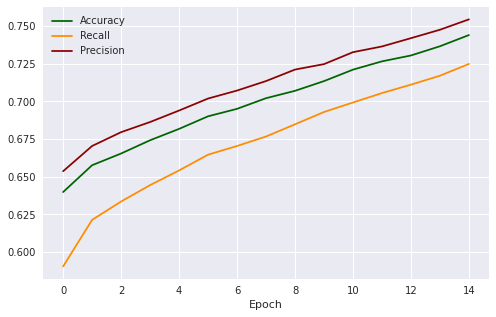

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(history_training.history['accuracy'],"darkgreen", label= "Accuracy")
plt.plot(history_training.history['recall'], "darkorange", label= "Recall")
plt.plot(history_training.history['precision'], "darkred", label= "Precision")
plt.xlabel('Epoch')
plt.legend()

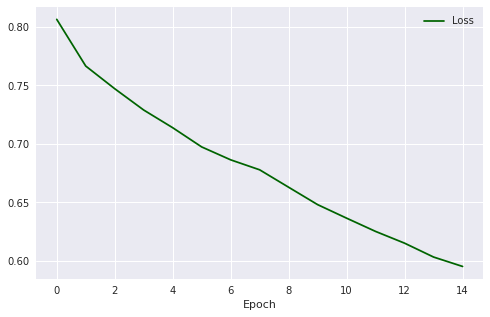

In [45]:
mpl.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(history_training.history['loss'],"darkgreen", label= "Loss")
plt.xlabel('Epoch')
plt.legend()

In [46]:
m.evaluate(data_valid, use_multiprocessing=True)

460/460 [==============================] - 43s 86ms/step - loss: 0.5265 - accuracy: 0.7735 - tp: 5635.0000 - fp: 1588.0000 - tn: 13126.0000 - fn: 1722.0000 - precision: 0.7801 - recall: 0.7659


[0.526484489440918,
 0.7735490202903748,
 5635.0,
 1588.0,
 13126.0,
 1722.0,
 0.7801467776298523,
 0.7659372091293335]

In [47]:
data_test

<SkipDataset shapes: ({input_ids: (None, 97), attention_mask: (None, 97)}, (None, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [48]:
res = m.predict(dataset_test,verbose=1)

1/1 [==============================] - 3s 3s/step


In [49]:
res.shape

(10, 3)

In [50]:
y_pred = np.argmax(res, axis = 1)

In [51]:
df_test['discourse_id']

0    a261b6e14276
1    5a88900e7dc1
2    9790d835736b
3    75ce6d68b67b
4    93578d946723
5    2e214524dbe3
6    84812fc2ab9f
7    c668ff840720
8    739a6d00f44a
9    bcfae2c9a244
Name: discourse_id, dtype: object

In [52]:
res_csv = pd.DataFrame({
    "discourse_id":df_test['discourse_id'],
    "Ineffective": res[:,1].astype(float),
    "Adequate": res[:,0].astype(float),
    "Effective": res[:,2].astype(float)
    
})

In [53]:

res_csv.head(n=10)

,discourse_id,Ineffective,Adequate,Effective
0,a261b6e14276,0.004766,0.770322,0.224912
1,5a88900e7dc1,0.024537,0.751959,0.223504
2,9790d835736b,0.026002,0.634759,0.339239
3,75ce6d68b67b,0.019844,0.329031,0.651125
4,93578d946723,0.003120,0.511181,0.485699
5,2e214524dbe3,0.001499,0.186716,0.811785
6,84812fc2ab9f,0.030693,0.895018,0.074290
7,c668ff840720,0.012426,0.805221,0.182354
8,739a6d00f44a,0.010036,0.602867,0.387097
9,bcfae2c9a244,0.040169,0.780897,0.178934


In [54]:
res_csv.to_csv("submission.csv",index=False)